In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import joblib
import os

In [2]:
# 1) Cargar datos
datos = pd.read_csv(filepath_or_buffer="C:/Users/jenif/Downloads/comprar_alquilar.csv")

In [3]:
datos

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [4]:

# 2) Exploración inicial
print("Dimensiones del dataset:", datos.shape)
print("\nTipos de datos:")
print(datos.dtypes)
print("\nResumen estadístico de variables numéricas:")
print(datos.describe())


Dimensiones del dataset: (202, 10)

Tipos de datos:
ingresos          int64
gastos_comunes    int64
pago_coche        int64
gastos_otros      int64
ahorros           int64
vivienda          int64
estado_civil      int64
hijos             int64
trabajo           int64
comprar           int64
dtype: object

Resumen estadístico de variables numéricas:
          ingresos  gastos_comunes  pago_coche  gastos_otros       ahorros  \
count   202.000000      202.000000  202.000000    202.000000    202.000000   
mean   4958.995050      971.584158  211.742574    515.425743  38749.668317   
std    1682.862556      272.106351  124.940754    168.103075  17365.231870   
min    2008.000000      384.000000    0.000000    201.000000  10319.000000   
25%    3513.750000      766.750000   99.000000    383.250000  24964.250000   
50%    4947.500000      968.000000  208.500000    522.500000  38523.000000   
75%    6374.500000     1165.250000  318.750000    656.750000  52150.750000   
max    7984.000000     15

In [5]:
# 3) Selección de variables numéricas
num_cols = datos.select_dtypes(include=["number"]).columns.tolist()
X = datos[num_cols]


In [6]:

# 4) Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 5) Aplicar PCA (95% de varianza explicada)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("\nNúmero de componentes seleccionadas:", pca.n_components_)
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)


Número de componentes seleccionadas: 8
Varianza explicada por cada componente:
[0.27368381 0.23958688 0.10991099 0.10411098 0.09105662 0.07352523
 0.0457761  0.02745036]


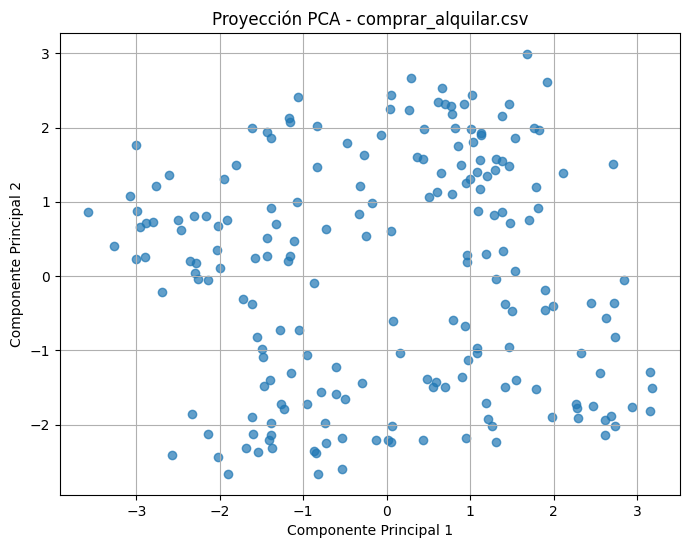

In [8]:
# 6) Visualización en 2D (si hay al menos 2 componentes)
if pca.n_components_ >= 2:
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title("Proyección PCA - comprar_alquilar.csv")
    plt.grid(True)
    plt.show()
else:
    print("Solo se obtuvo 1 componente principal. No se puede graficar en 2D.")

In [9]:
# 7) Guardar modelo y escalador
os.makedirs("model", exist_ok=True)
joblib.dump(pca, "model/pca_comprar_alquilar.pkl")
joblib.dump(scaler, "model/scaler_comprar_alquilar.pkl")
print("\nModelos guardados .")


Modelos guardados .
